# Tarea 09

### Kenneth Yar

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def eliminacionGaussiana(A, b):
    n = len(b)
    # Augmentar la matriz A con el vector b
    Ab = np.hstack([A, b.reshape(-1, 1)])
    intercambios = []

    for i in range(n):
        # Verificar que el pivote no sea cero
        if np.isclose(Ab[i, i], 0):
            for j in range(i+1, n):
                if not np.isclose(Ab[j, i], 0):
                    # Intercambiar filas
                    Ab[[i, j]] = Ab[[j, i]]
                    intercambios.append((i, j))
                    break
            else:
                print("El sistema no tiene solución única")
                break        
        # Normalizar el pivote
        Ab[i] = Ab[i] / Ab[i, i]
        
        # Hacer ceros debajo del pivote
        for j in range(i+1, n):
            Ab[j] -= Ab[j, i] * Ab[i]
    
    print("Matriz escalonada:")
    print(Ab)
    print("\nIntercambios de fila realizados:")
    for intercambio in intercambios:
        print(f"Fila {intercambio[0]} intercambiada con Fila {intercambio[1]}")

    return Ab, intercambios
    
def sustitucionAtras(Ab):
    n = len(Ab)
    x = np.zeros(n)
    
    for i in range(n - 1, -1, -1):
        x[i] = np.round((Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:])) / Ab[i, i],2)
    
    print("\nSoluciones:")
    print(x)

def GaussJordan(A):
    n = A.shape[0]
    
    for i in range(n):
        if A[i, i] == 0:
            print(f"Error: Pivote cero en la fila {i}, el sistema no tiene solución única.")
            return None
        
        A[i, :] = A[i, :] / A[i, i]
        
        for j in range(n):
            if i != j:
                factor = A[j, i]
                A[j, :] = A[j, :] - factor * A[i, :]
    
    print("Matriz final:")
    print(A)
    
    print("Soluciones:")
    return A[:, -1]

def metodográfico(y_vals):
    x_vals = np.linspace(-10, 10, 400)
    
    # Crear el gráfico
    plt.figure(figsize=(6, 6))
    for yvals in y_vals:
        plt.plot(x_vals, yvals, label=r'Ecuación ')

    # Ajustar los límites del gráfico
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

    # Etiquetas y título
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sistema de ecuaciones lineales')

    # Añadir leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.grid(True)
    plt.show()

### EJERCICIO 1

In [49]:
x_vals = np.linspace(-10, 10, 400)

##### Literal a

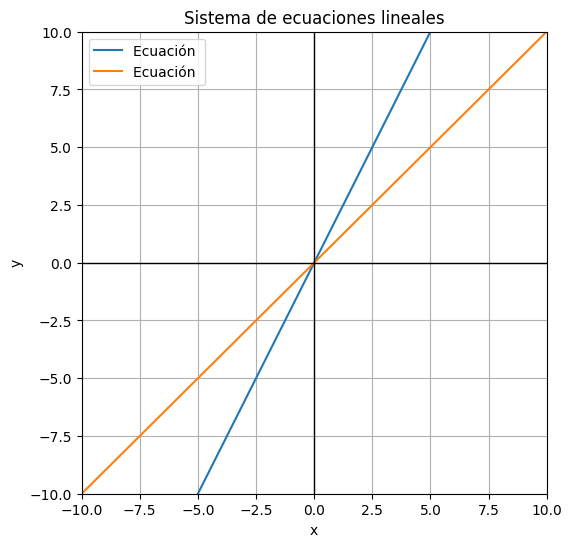

In [50]:
y_vals_1 = 2 * x_vals 
y_vals_2 = x_vals
y_vals=[y_vals_1,y_vals_2]
metodográfico(y_vals)

Las rectas se cortan en el punto 0 así que esa es la respuesta

##### Literal b

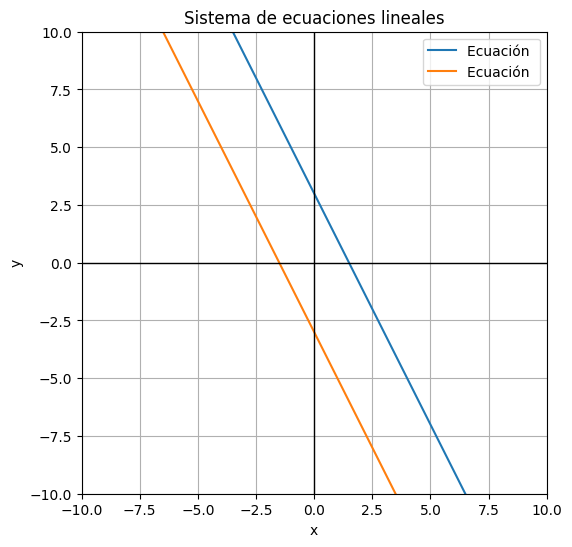

In [51]:
y_vals_1 = 3 - 2 * x_vals 
y_vals_2 = (6+4*x_vals)/-2
y_vals=[y_vals_1,y_vals_2]
metodográfico(y_vals)

Las rectas son paralelas y no se topan por lo que no existe solución

#### Literal c

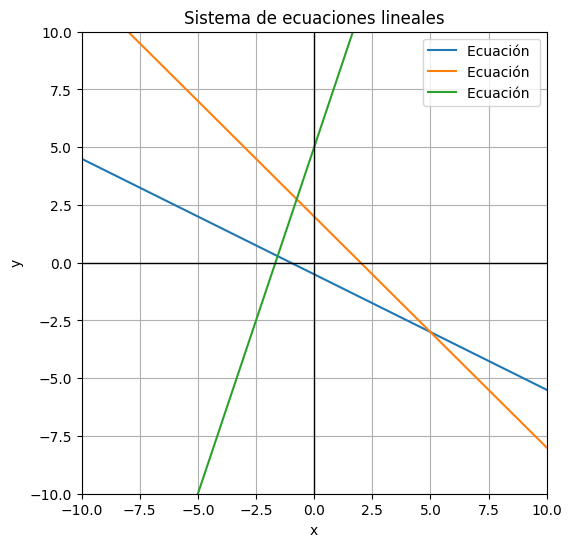

In [52]:
y_vals_1 = (-1-x_vals)/2
y_vals_2 = 2-x_vals
y_vals_3=5+3*x_vals
y_vals=[y_vals_1,y_vals_2,y_vals_3]
metodográfico(y_vals)

Ya que las 3 rectas no se topan en un solo punto el sistema no tiene solución

#### Literal d

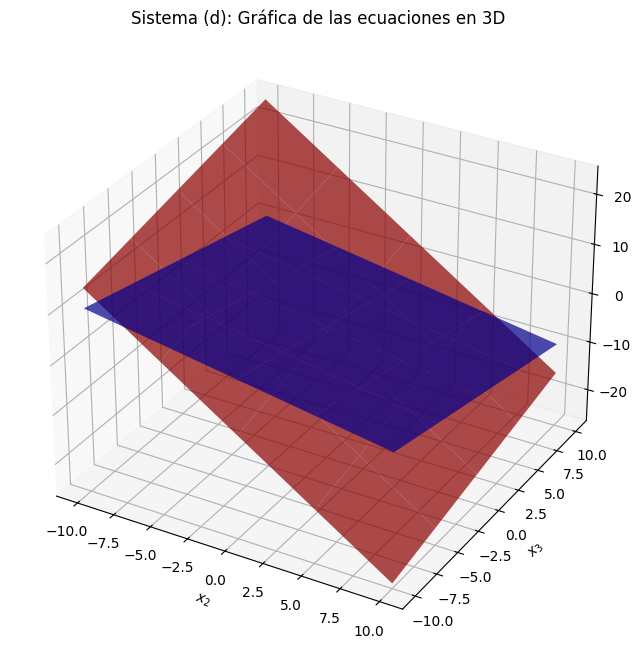

In [53]:
x_vals_2=np.linspace(-10, 10, 400)
x2_d1 = np.linspace(-10, 10, 400)
x_vals, x_vals_2 = np.meshgrid(x2_d1, x_vals_2)
y_vals_1 = (1-x_vals-x_vals_2)/2
y_vals_2 = (-1-4*x_vals+x_vals_2)/2
y_vals=[y_vals_1,y_vals_2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficies
ax.plot_surface(x_vals, x_vals_2, y_vals_1, alpha=0.7, rstride=100, cstride=100, color='blue', label="2x1 + x2 + x3 = 1")
ax.plot_surface(x_vals, x_vals_2, y_vals_2, alpha=0.7, rstride=100, cstride=100, color='red', label="2x1 + 4x2 - x3 = -1")

# Etiquetas
ax.set_title("Sistema (d): Gráfica de las ecuaciones en 3D")
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_3$")
ax.set_zlabel("$x_1$")
plt.show()

Ya que solo hay 2 ecuaciones pero 3 variables el sistema no tiene solución.

### EJERCICIO 2

##### Literal a

In [54]:
A=np.array([[-1,4,1],[5/3,2/3,2/3],[2,1,4]], dtype=float)
b=np.array([8,1,11], dtype=float)
Matriz_escalonada, intercambios =eliminacionGaussiana(A,b)
soluciones = sustitucionAtras(Matriz_escalonada)

Matriz escalonada:
[[ 1.         -4.         -1.         -8.        ]
 [ 0.          1.          0.31818182  1.95454545]
 [ 0.          0.          1.          3.        ]]

Intercambios de fila realizados:

Soluciones:
[-1.  1.  3.]


##### Literal b

In [55]:
A=np.array([[4,2,-1],[1/9,1/9,-1/3],[1,4,2]], dtype=float)
b=np.array([-5,-1,9], dtype=float)
Matriz_escalonada, intercambios =eliminacionGaussiana(A,b)
soluciones = sustitucionAtras(Matriz_escalonada)

Matriz escalonada:
[[  1.     0.5   -0.25  -1.25]
 [  0.     1.    -5.5  -15.5 ]
 [  0.     0.     1.     3.  ]]

Intercambios de fila realizados:

Soluciones:
[-1.  1.  3.]


### EJERCICIO 3

#### Literal a

In [56]:
A=np.array([[1,-1,3],[3,-3,1],[1,1,0]], dtype=float)
b=np.array([2,-1,3], dtype=float)
Matriz_escalonada, intercambios =eliminacionGaussiana(A,b)
soluciones = sustitucionAtras(Matriz_escalonada)

Matriz escalonada:
[[ 1.    -1.     3.     2.   ]
 [ 0.     1.    -1.5    0.5  ]
 [-0.    -0.     1.     0.875]]

Intercambios de fila realizados:
Fila 1 intercambiada con Fila 2

Soluciones:
[1.18 1.82 0.88]


#### Literal b

In [57]:
A=np.array([[2,-1.5,3],[-1,0,2],[4,-4.5,5]], dtype=float)
b=np.array([1,3,1], dtype=float)
Matriz_escalonada, intercambios =eliminacionGaussiana(A,b)
soluciones = sustitucionAtras(Matriz_escalonada)

Matriz escalonada:
[[ 1.         -0.75        1.5         0.5       ]
 [-0.          1.         -4.66666667 -4.66666667]
 [-0.         -0.          1.          1.        ]]

Intercambios de fila realizados:

Soluciones:
[-1.  0.  1.]


#### Literal c

In [58]:
A=np.array([[2,0,0,0],[1,1.5,0,0],[0,-3,0.5,0],[2,-2,1,1]], dtype=float)
b=np.array([3,4.5,-6.6,0.8], dtype=float)
Matriz_escalonada, intercambios =eliminacionGaussiana(A,b)
soluciones = sustitucionAtras(Matriz_escalonada)

Matriz escalonada:
[[ 1.   0.   0.   0.   1.5]
 [ 0.   1.   0.   0.   2. ]
 [ 0.   0.   1.   0.  -1.2]
 [ 0.   0.   0.   1.   3. ]]

Intercambios de fila realizados:

Soluciones:
[ 1.5  2.  -1.2  3. ]


#### Literal d

In [59]:
A=np.array([[1,1,0,1],[2,1,-1,1],[4,-1,-2,2],[3,-1,-1,2]], dtype=float)
b=np.array([2,1,0,3], dtype=float)
Matriz_escalonada, intercambios =eliminacionGaussiana(A,b)

El sistema no tiene solución única
Matriz escalonada:
[[ 1.          1.          0.          1.          2.        ]
 [-0.          1.          1.          1.          3.        ]
 [ 0.          0.          1.          1.          2.33333333]
 [ 0.          0.          0.          0.          2.        ]]

Intercambios de fila realizados:


### Ejercicio 4

#### Literal a

In [60]:
A=np.array([[1/4,1/5,1/6],[1/3,1/4,1/5],[1/2,1,2]], dtype=float)
b=np.array([9,8,8], dtype=float)
Matriz_escalonada, intercambios =eliminacionGaussiana(A,b)
soluciones = sustitucionAtras(Matriz_escalonada)

Matriz escalonada:
[[   1.            0.8           0.66666667   36.        ]
 [  -0.            1.            1.33333333  240.        ]
 [   0.            0.            1.         -177.69230769]]

Intercambios de fila realizados:

Soluciones:
[-227.08  476.92 -177.69]


#### Literal b

In [61]:
A=np.array([[3.333,15920,-10.333],[2.222,16.71,9.612],[1.5611,5.1791,1.6852]], dtype=float)
b=np.array([15913,28.544,8.4254], dtype=float)
Matriz_escalonada, intercambios =eliminacionGaussiana(A,b)
soluciones = sustitucionAtras(Matriz_escalonada)

Matriz escalonada:
[[ 1.00000000e+00  4.77647765e+03 -3.10021002e+00  4.77437744e+03]
 [-0.00000000e+00  1.00000000e+00 -1.55716271e-03  9.98442837e-01]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00  1.00000000e+00]]

Intercambios de fila realizados:

Soluciones:
[1. 1. 1.]


#### Literal c

In [62]:
A=np.array([[1,1/2,1/3,1/4],[1/2,1/3,1/4,1/5],[1/3,1/4,1/5,1/6],[1/4,1/5,1/6,1/7]], dtype=float)
b=np.array([1/6,1/7,1/8,1/9], dtype=float)
Matriz_escalonada, intercambios =eliminacionGaussiana(A,b)
soluciones = sustitucionAtras(Matriz_escalonada)

Matriz escalonada:
[[1.         0.5        0.33333333 0.25       0.16666667]
 [0.         1.         1.         0.9        0.71428571]
 [0.         0.         1.         1.5        1.78571429]
 [0.         0.         0.         1.         2.77777778]]

Intercambios de fila realizados:

Soluciones:
[-0.03  0.59 -2.38  2.78]


#### Literal d

In [63]:
A=np.array([[2,1,-1,1,-3],[1,0,2,-1,1],[0,-2,-1,1,-1],[3,1,-4,0,5],[1,-1,-1,-1,1]], dtype=float)
b=np.array([7,2,-5,6,-3], dtype=float)
Matriz_escalonada, intercambios =eliminacionGaussiana(A,b)
soluciones = sustitucionAtras(Matriz_escalonada)

Matriz escalonada:
[[ 1.          0.5        -0.5         0.5        -1.5         3.5       ]
 [-0.          1.         -5.          3.         -5.          3.        ]
 [-0.         -0.          1.         -0.63636364  1.         -0.09090909]
 [-0.         -0.         -0.          1.         -3.77142857  1.08571429]
 [-0.         -0.         -0.         -0.          1.          0.09356725]]

Intercambios de fila realizados:

Soluciones:
[1.88 2.81 0.73 1.43 0.09]


### Ejercicio 6

#### Literal a

Para saber si existe suficiente alimento para el consumo promedio diario, debemos multiplicar la matriz A por el número de especies x

In [70]:
A = np.array([[1, 2, 0, 3], [1, 0, 2, 2],[0,0,1,1]])
X = np.array([1000, 500,350,400])

# Multiplicación de matrices
resultado = np.dot(A, X) 

print("Resultado:")
print(resultado)

Resultado:
[3200 2500  750]


#### Literal B

In [78]:
A = np.array([[1,2,0,3],[1,0,2,2],[0,0,1,1]])
x = np.array([1005,511,355,491])
b_obtenido = np.dot(A,x)
print("El vector de consumo promedio diario es de:",b_obtenido)

El vector de consumo promedio diario es de: [3500 2697  846]


Por tanto, para que el alimento alcancé para todas las especies estás pueden crecer de la siguiente manera:
- Especie 1: Crece máximo en 5 individuos.
- Especie 2: Crece máximo en 11 individios.
- Especie 3: Crece máximo en 5 individuos.
- Especie 4: Crece máximo en 91 individuos.


#### Literal c

In [79]:
A = np.array([[1,2,0,3],[1,0,2,2],[0,0,1,1]])
x = np.array([0,1000,400,500])
b_obtenido = np.dot(A,x)
print("El vector de consumo promedio diario es de:",b_obtenido)

El vector de consumo promedio diario es de: [3500 1800  900]


Por tanto, si la especie 1 se extingue, las otras especies tener los siguientes incrementos de su población:
- Especie 2: Se incrementa en 500.
- Especie 3: Se incrementa en 50.
- Especie 4: Se incrementa en 100

#### Literal d

In [80]:
A = np.array([[1,2,0,3],[1,0,2,2],[0,0,1,1]])
x = np.array([1080,0,380,430])
b_obtenido = np.dot(A,x)
print("El vector de consumo promedio diario es de:",b_obtenido)

El vector de consumo promedio diario es de: [2370 2700  810]


### Ejercicio 7

In [84]:
print("Literal a:\n")
A = np.array([[1/4,1/5,1/6,9],[1/3,1/4,1/5,8],[1/2,1,2,8]])
sol_a = GaussJordan(A)
print("\nLa solución es:",sol_a)
print("\nLiteral b:\n")
B = np.array([[3.333,15920,-10.333,15913],[2.222,16.71,9.612,28.544],[1.5611,5.1791,1.6852,8.4254]])
sol_b = GaussJordan(B)
print("\nLa solución es:",sol_b)
print("\nLiteral c:\n")
C = np.array([[1,1/2,1/3,1/4,1/6],[1/2,1/3,1/4,1/5,1/7],[1/3,1/4,1/5,1/6,1/8],[1/4,1/5,1/6,1/7,1/9]])
sol_c = GaussJordan(C)
print("\nLa solución es:",sol_c)
print("\nLiteral d:\n")
D = np.array([[2,1,-1,1,-3,7],[1,0,2,-1,1,2],[0,-2,-1,1,-1,-5],[3,1,-4,0,5,6],[1,-1,-1,-1,1,-3]])
sol_d = GaussJordan(D)
print("\nLa solución es:",sol_d)

Literal a:

Matriz final:
[[   1.            0.            0.         -227.07692308]
 [  -0.            1.            0.          476.92307692]
 [   0.            0.            1.         -177.69230769]]
Soluciones:

La solución es: [-227.07692308  476.92307692 -177.69230769]

Literal b:

Matriz final:
[[ 1.  0.  0.  1.]
 [-0.  1.  0.  1.]
 [-0. -0.  1.  1.]]
Soluciones:

La solución es: [1. 1. 1.]

Literal c:

Matriz final:
[[ 1.          0.          0.          0.         -0.03174603]
 [ 0.          1.          0.          0.          0.5952381 ]
 [ 0.          0.          1.          0.         -2.38095238]
 [ 0.          0.          0.          1.          2.77777778]]
Soluciones:

La solución es: [-0.03174603  0.5952381  -2.38095238  2.77777778]

Literal d:

Error: Pivote cero en la fila 1, el sistema no tiene solución única.

La solución es: None


Link: https://github.com/KennethJYS/Eliminaci-n-gaussiana-vs-Gauss-Jordan